## Telecom User Data Analysis

### Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from statistics import mean
from pandas_profiling import ProfileReport
import numpy as np

### Data Preprocessing

In [224]:
data = pd.read_excel("../data/telcom.xlsx",engine='openpyxl')

In [2]:
df = pd.read_csv("../data/telcom.csv")

In [223]:
data.head(4)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/19 12:01,770.0,4/25/19 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/19 13:04,235.0,4/25/19 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/19 17:42,1.0,4/25/19 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/19 0:31,486.0,4/25/19 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0


In [118]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
### Check for sufficiency of data to answer objectives by reviewing the objective and 
### available data. And check the number of observations and required sample size.

In [119]:
df.columns.to_list()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [120]:
df.shape

(150001, 55)

In [12]:
### Check for timeliness of the data

In [10]:
### checking for duplicates

In [13]:
### Check for column organization and naming and correct them.

In [59]:
### Check for missing values and either fill them with a value that will, in no way, 
### affect the analysis or remove the record.

In [21]:
def handle_missing_values(df,x):
    """
    this algorithm does the following
    - remove columns with x percentage of missing values
    - fill the missing values with the mean
    returns:
        - df
        - percentage of missing values
    """
    missing_percentage = round((df.isnull().sum().sum()/\
            reduce(lambda x, y: x*y, df.shape))*100,2)
    null_cols = df.isnull().sum().to_dict()
    for key,val in null_cols.items():
        if val/df.shape[0] > x:
            df.drop([key], axis=1)
        elif  val/df.shape[0] < x and val > 0 and df[key].dtype.kind in 'biufc':
            df.fillna(df[key].mean().round(1), inplace=True)
    return missing_percentage, df

In [26]:
# test the function
missing_percentage,df_ = handle_missing_values(df,x=0.3)
True in df.isna().any().to_list()

False

In [24]:
df_.isnull().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [25]:
df_.shape

(150001, 55)

In [15]:
### Check for misspellings, Inconsistent capitalization, and Incorrect punctuation and other typos and 
### make corrections.

In [16]:
### Check for correct character patterns like length and type of characters and make corrections.

In [17]:
### Check for values that don't make sense given knowledge of the field and make corrections.

In [18]:
### Check for value ranges and make corrections.

In [167]:
### Check for repeating or skipping patterns in variables whose values must be in sequence 
### or whose values must be unique and make corrections

In [168]:
### Top X Columns

In [164]:
def top_x_column(df, x, column,color):
    handsets_df = pd.DataFrame(columns = [column])
    handsets_df['type'] = df[column].to_list()
    handests = handsets_df['type'].value_counts()
    fig,ax = plt.subplots()
    ax.tick_params(axis='x',labelsize=10)
    ax.tick_params(axis='y',labelsize=10)
    ax.set_xlabel("Handset")
    ax.set_ylabel("Frequency")
    ax.set_title(f"The {x} Most Frequent {column}")
    handests[:x].plot(ax=ax,kind='bar',color=color)

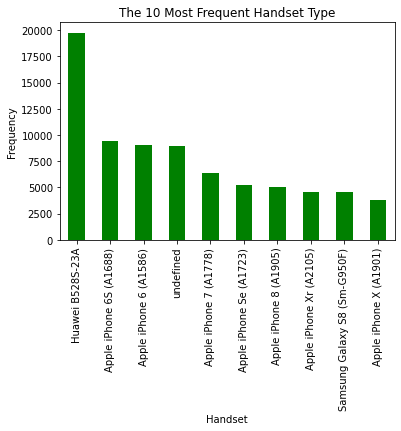

In [165]:
# Identifying the top 10 handsets used by the customers.
top_x_column(df,10,'Handset Type','green')

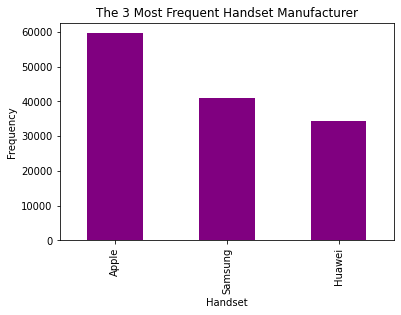

In [166]:
# Identifying the top 3 handset manufacturers
top_x_column(df,3,'Handset Manufacturer','purple')

In [196]:
# Identify the top 5 handsets per top 3 handset manufacturer
by_manufacture = df.groupby("Handset Manufacturer",sort=True)

for manufacturer, frame in by_manufacture:
    if manufacturer in ['Apple','Samsung','Huawei']:
        print(f"First 5 entries for {manufacturer!r}")
        print("------------------------")
        print(frame.head(5)['Handset Type'], end="\n\n")


First 5 entries for 'Apple'
------------------------
22    Apple iPhone 6S (A1688)
48    Apple iPhone 6S (A1688)
51    Apple iPhone Se (A1723)
52     Apple iPhone 8 (A1905)
54    Apple iPhone 6S (A1688)
Name: Handset Type, dtype: object

First 5 entries for 'Huawei'
------------------------
6     Huawei Mate 20 Lite
11        Huawei B593S-22
20           Huawei E5180
25         Huawei P20 Pro
30           Huawei E5180
Name: Handset Type, dtype: object

First 5 entries for 'Samsung'
------------------------
0     Samsung Galaxy A5 Sm-A520F
1    Samsung Galaxy J5 (Sm-J530)
2       Samsung Galaxy A8 (2018)
4               Samsung Sm-G390F
8       Samsung Galaxy A8 (2018)
Name: Handset Type, dtype: object



In [197]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [20]:
# Aggregation per user the following information in the column  
# number of xDR sessions
# Session duration
# the total download (DL) and upload (UL) data
# the total data volume (in Bytes) during this session for each application


In [37]:
grouped = df.groupby('MSISDN/Number').agg({'Bearer Id': [min, max, mean]}) 
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]

In [38]:
grouped

,Bearer Id_min,Bearer Id_max,Bearer Id_mean
MSISDN/Number,,,
3.360100e+10,1.311448e+19,1.311448e+19,1.311448e+19
3.360100e+10,7.349883e+18,7.349883e+18,7.349883e+18
3.360100e+10,7.349883e+18,7.349883e+18,7.349883e+18
3.360101e+10,1.304243e+19,1.304243e+19,1.304243e+19
3.360101e+10,7.277826e+18,7.349883e+18,7.313854e+18
...,...,...,...
3.379000e+10,1.311448e+19,1.311448e+19,1.311448e+19
3.197021e+12,7.277826e+18,7.277826e+18,7.277826e+18
3.370000e+14,7.349883e+18,7.349883e+18,7.349883e+18


In [35]:
grouped = df.groupby('MSISDN/Number').agg({"Dur. (ms)": [min, max, mean]}) 
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]

In [36]:
grouped

,Dur. (ms)_min,Dur. (ms)_max,Dur. (ms)_mean
MSISDN/Number,,,
3.360100e+10,116720.0,1.167200e+05,1.167200e+05
3.360100e+10,181230.0,1.812300e+05,1.812300e+05
3.360100e+10,134969.0,1.349690e+05,1.349690e+05
3.360101e+10,49878.0,4.987800e+04,4.987800e+04
3.360101e+10,18549.0,1.855500e+04,1.855200e+04
...,...,...,...
3.379000e+10,140988.0,1.409880e+05,1.409880e+05
3.197021e+12,877385.0,8.773850e+05,8.773850e+05
3.370000e+14,253030.0,2.530300e+05,2.530300e+05


In [39]:
grouped = df.groupby('MSISDN/Number').agg({'Total DL (Bytes)': [min, max, mean]}) 
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]

In [44]:
grouped

,Total DL (Bytes)_min,Total DL (Bytes)_max,Total DL (Bytes)_mean
MSISDN/Number,,,
3.360100e+10,842637466.0,8.426375e+08,8.426375e+08
3.360100e+10,120755184.0,1.207552e+08,1.207552e+08
3.360100e+10,556659663.0,5.566597e+08,5.566597e+08
3.360101e+10,401993172.0,4.019932e+08,4.019932e+08
3.360101e+10,547096937.0,8.160335e+08,6.815652e+08
...,...,...,...
3.379000e+10,444575092.0,4.445751e+08,4.445751e+08
3.197021e+12,194828056.0,1.948281e+08,1.948281e+08
3.370000e+14,539634985.0,5.396350e+08,5.396350e+08


## EDA Analysis

In [190]:
X = df.drop('Total DL (Bytes)', axis=1)
y = df['Total DL (Bytes)']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.3, 
                                                random_state=1121218)

In [ ]:
X = numerical_transforms
y = numerical_transforms[]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.3, 
                                                random_state=1121218)

In [138]:
len(numerical_transforms[25:,])

149976

In [71]:
pca_1 = pd.concat([X_train,y_train])

In [72]:
pca_1.shape

(150000, 55)

In [63]:
X = X_train
y = y_train
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.5, 
                                                random_state=1121218)

In [64]:
#### pca analysis
pca_2 = pd.concat([X_valid,y_valid])

In [65]:
pca_2.shape

(105000, 55)

In [66]:
pca_3 = pd.concat([X_train,y_train])

In [67]:
pca_3.shape

(105000, 55)

In [74]:
all_samples = np.concatenate((pca_2, pca_3), axis=1)

In [75]:
mean_pca_1 = np.mean(pca_2)

In [77]:
mean_pca_2 = np.mean(pca_3)

In [78]:
mean_vector = np.array([[mean_pca_1],[mean_pca_2]])

In [79]:
mean_vector

array([[[4.54295952e+08, 7.79753474e-01, 1.71721947e+00, 3.08243220e+00,
         1.57524021e-01, 1.81004687e+06, 1.39066567e+06, 1.33287265e+04,
         1.76804914e+03, 1.08596152e+02, 1.76773952e+01, 9.28219105e+01,
         1.62339949e+00, 1.05063711e+05, 1.05064256e+08, 1.78390041e+06,
         4.66875666e+05, 4.98175241e+02, 4.21604939e+08, 8.26757629e+06,
         5.75133629e+06, 2.05923587e+06, 1.14690937e+08, 3.37541770e+06,
         4.83875038e+13, 2.08201762e+14, 3.36745482e+10, 9.86969119e+02,
         3.50048430e+02, 8.08374346e+02, 1.55054519e+02, 9.60546426e+02,
         1.49170983e+02, 3.64141976e+03, 3.93752416e+03, 1.16478738e+07,
         1.09848253e+07, 4.21085620e+08, 8.23492703e+06, 1.79633005e+06,
         3.28865301e+04, 5.00952647e+02, 1.99407532e+07, 6.90309549e+05,
         4.10422844e+07, 9.85199441e+01, 7.60440991e-02, 1.17115787e+07,
         1.09959592e+07]],

       [[4.55273197e+08, 7.70623396e-01, 1.72438474e+00, 3.08433804e+00,
         1.41978620e-01

In [89]:
scatter_matrix = np.zeros((2,2))

In [118]:
from sklearn.decomposition import PCA

In [140]:
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())
])

In [145]:
round(len(df)*0.3)

45000

In [149]:
data_transforms = numeric_pipeline.fit_transform(df.select_dtypes(include='number'))

In [156]:
train = data_transforms[round(len(df)*0.7):]

In [157]:
test = data_transforms[round(len(df)*0.3):]

In [135]:
len(numerical_transforms)

150001

In [115]:
def pca_dec(data, n):
    pca = PCA(n)
    X_dec = pca.fit_transform(data)
    return X_dec, pca


In [158]:
pca_train_results, pca_train = pca_dec(train, 10)

In [159]:
pca_test_results, pca_test = pca_dec(test, 10)

In [164]:
#Creating a table with the explained variance ratio
names_pcas = [f"PCA Component {i}" for i in range(1, 11, 1)]
scree = pd.DataFrame(list(zip(names_pcas, pca_train.explained_variance_ratio_)), columns=["Component", "Explained Variance Ratio"])
print(scree)

          Component  Explained Variance Ratio
0   PCA Component 1                  0.102829
1   PCA Component 2                  0.068152
2   PCA Component 3                  0.063804
3   PCA Component 4                  0.056242
4   PCA Component 5                  0.055653
5   PCA Component 6                  0.055301
6   PCA Component 7                  0.055061
7   PCA Component 8                  0.054711
8   PCA Component 9                  0.054359
9  PCA Component 10                  0.054217


In [169]:
len(pca_train.components_[0])

49

In [174]:
#Sorting the values of the first principal component by how large each one is
df = pd.DataFrame({'PCA':pca_train.components_[0], 'Variable Names':numerical_features})
df = df.sort_values('PCA', ascending=False)

#Sorting the absolute values of the first principal component by magnitude
df2 = pd.DataFrame(df)
df2['PCA']=df2['PCA'].apply(np.absolute)
df2 = df2.sort_values('PCA', ascending=False)
#print(df2['Variable Names'][0:11])

df.head()

,PCA,Variable Names
0,0.016429,Start ms
1,0.016254,End ms
45,0.006213,Other DL (Bytes)
37,0.006036,Email DL (Bytes)
35,0.003318,Google DL (Bytes)


In [178]:
#Sorting the values of the first principal component by how large each one is
for i in range(len(pca_train.components_)):
    df = pd.DataFrame({'PCA':pca_train.components_[i], 'Variable Names':numerical_features})
    df = df.sort_values('PCA', ascending=False)

    #Sorting the absolute values of the first principal component by magnitude
    df2 = pd.DataFrame(df)
    df2['PCA']=df2['PCA'].apply(np.absolute)
    df2 = df2.sort_values('PCA', ascending=False)
    #print(df2['Variable Names'][0:11])

    print(df.head())

         PCA     Variable Names
0   0.016429           Start ms
1   0.016254             End ms
45  0.006213   Other DL (Bytes)
37  0.006036   Email DL (Bytes)
35  0.003318  Google DL (Bytes)
         PCA      Variable Names
0   0.067258            Start ms
1   0.066972              End ms
35  0.027149   Google DL (Bytes)
41  0.026389  Netflix DL (Bytes)
45  0.023379    Other DL (Bytes)
         PCA           Variable Names
34  0.037392  Social Media UL (Bytes)
38  0.031206         Email UL (Bytes)
37  0.024136         Email DL (Bytes)
39  0.009145       Youtube DL (Bytes)
33  0.009004  Social Media DL (Bytes)
         PCA           Variable Names
33  0.464824  Social Media DL (Bytes)
46  0.434040         Other UL (Bytes)
37  0.433075         Email DL (Bytes)
38  0.209987         Email UL (Bytes)
45  0.087597         Other DL (Bytes)
         PCA           Variable Names
34  0.504424  Social Media UL (Bytes)
44  0.238012        Gaming UL (Bytes)
38  0.209118         Email UL (Bytes)
42

In [184]:
numerical_features

['Start ms',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Em

In [185]:
categorical_features

['Bearer Id',
 'Start',
 'End',
 'Last Location Name',
 'Handset Manufacturer',
 'Handset Type']

In [191]:
#bivariate analysis
import seaborn as sns
pd.crosstab(X_valid['Start'], X_valid['End'], margins=True, values=X_valid['Google DL (Bytes)'], aggfunc=pd.Series.count)
# 3 any other aggregation function can be used based on column type
# to create a heatmap by enclosing the above in sns.heatmap
# sns.heatmap(pd.crosstab(df['Start'], df['End'], margins=True, values=df['Total DL (Bytes)'], aggfunc=pd.Series.count),
#             cmap="YlGnBu", annot=True, cbar=False)

MemoryError: Unable to allocate 11.7 GiB for an array with shape (40615, 38589) and data type float64

In [14]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [15]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/19 12:01,770.0,4/25/19 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/19 13:04,235.0,4/25/19 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/19 17:42,1.0,4/25/19 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/19 0:31,486.0,4/25/19 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/19 20:10,565.0,4/25/19 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [20]:
# categorizing data
categorizing_deciles = pd.qcut(df['Dur. (ms)'], 10,duplicates='drop')

In [27]:
deciles = categorizing_deciles.values.codes
deciles

array([ 8,  8,  8, ...,  5,  5, -1], dtype=int8)

In [ ]:
deciles_ = df.apply(lambda x: pd.qcut(x['Dur. (ms)'],10, duplicates='drop'), axis=1)

In [25]:
np.argwhere(dec.values['Dur. (ms)'] == pd.qcut(df['Dur. (ms)'],10, duplicates='drop').categories.max())

,0
0,8
1,8
2,8
3,8
4,8
...,...
149996,3
149997,5
149998,5
149999,5


In [11]:
### correlation matrix

In [9]:
applications = df[['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']]

In [12]:
social_media_corelation_matrix  = applications.corr()

In [13]:
social_media_corelation_matrix

,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
Social Media DL (Bytes),1.000000,-0.000555,-0.001954,0.000186,0.004745,-0.002518,-0.001389,0.002345,-0.001817,0.003457,0.001018,0.003095,0.006126,0.000610
Social Media UL (Bytes),-0.000555,1.000000,0.003542,0.001085,0.004823,-0.001427,-0.001786,-0.002368,-0.000772,-0.002493,0.000210,0.000844,-0.003850,0.000971
Google DL (Bytes),-0.001954,0.003542,1.000000,-0.000103,-0.000039,0.000742,0.001760,0.000638,0.000548,-0.001569,-0.001421,-0.001429,-0.002557,-0.000882
Google UL (Bytes),0.000186,0.001085,-0.000103,1.000000,-0.001157,-0.002050,0.001122,0.001670,-0.001288,-0.004073,0.001140,-0.002516,0.002097,-0.002219
Email DL (Bytes),0.004745,0.004823,-0.000039,-0.001157,1.000000,0.002553,0.001679,-0.004305,0.001351,-0.000016,0.000050,-0.004335,-0.000444,0.004675
Email UL (Bytes),-0.002518,-0.001427,0.000742,-0.002050,0.002553,1.000000,-0.000320,-0.006834,-0.000011,0.000532,-0.002519,0.005000,-0.003805,0.000081
Youtube DL (Bytes),-0.001389,-0.001786,0.001760,0.001122,0.001679,-0.000320,1.000000,0.002433,0.001202,0.001746,-0.001861,-0.001893,0.002042,-0.004830
Youtube UL (Bytes),0.002345,-0.002368,0.000638,0.001670,-0.004305,-0.006834,0.002433,1.000000,0.000423,0.002477,-0.002382,0.000898,0.002296,-0.001393
Netflix DL (Bytes),-0.001817,-0.000772,0.000548,-0.001288,0.001351,-0.000011,0.001202,0.000423,1.000000,0.001065,-0.003201,-0.000633,-0.006000,-0.002588
Netflix UL (Bytes),0.003457,-0.002493,-0.001569,-0.004073,-0.000016,0.000532,0.001746,0.002477,0.001065,1.000000,-0.001051,-0.004015,-0.006691,-0.003447


array([[<AxesSubplot:title={'center':'Start ms'}>,
        <AxesSubplot:title={'center':'End ms'}>,
        <AxesSubplot:title={'center':'Dur. (ms)'}>,
        <AxesSubplot:title={'center':'IMSI'}>,
        <AxesSubplot:title={'center':'MSISDN/Number'}>,
        <AxesSubplot:title={'center':'IMEI'}>,
        <AxesSubplot:title={'center':'Avg RTT DL (ms)'}>],
       [<AxesSubplot:title={'center':'Avg RTT UL (ms)'}>,
        <AxesSubplot:title={'center':'Avg Bearer TP DL (kbps)'}>,
        <AxesSubplot:title={'center':'Avg Bearer TP UL (kbps)'}>,
        <AxesSubplot:title={'center':'TCP DL Retrans. Vol (Bytes)'}>,
        <AxesSubplot:title={'center':'TCP UL Retrans. Vol (Bytes)'}>,
        <AxesSubplot:title={'center':'DL TP < 50 Kbps (%)'}>,
        <AxesSubplot:title={'center':'50 Kbps < DL TP < 250 Kbps (%)'}>],
       [<AxesSubplot:title={'center':'250 Kbps < DL TP < 1 Mbps (%)'}>,
        <AxesSubplot:title={'center':'DL TP > 1 Mbps (%)'}>,
        <AxesSubplot:title={'center':'UL

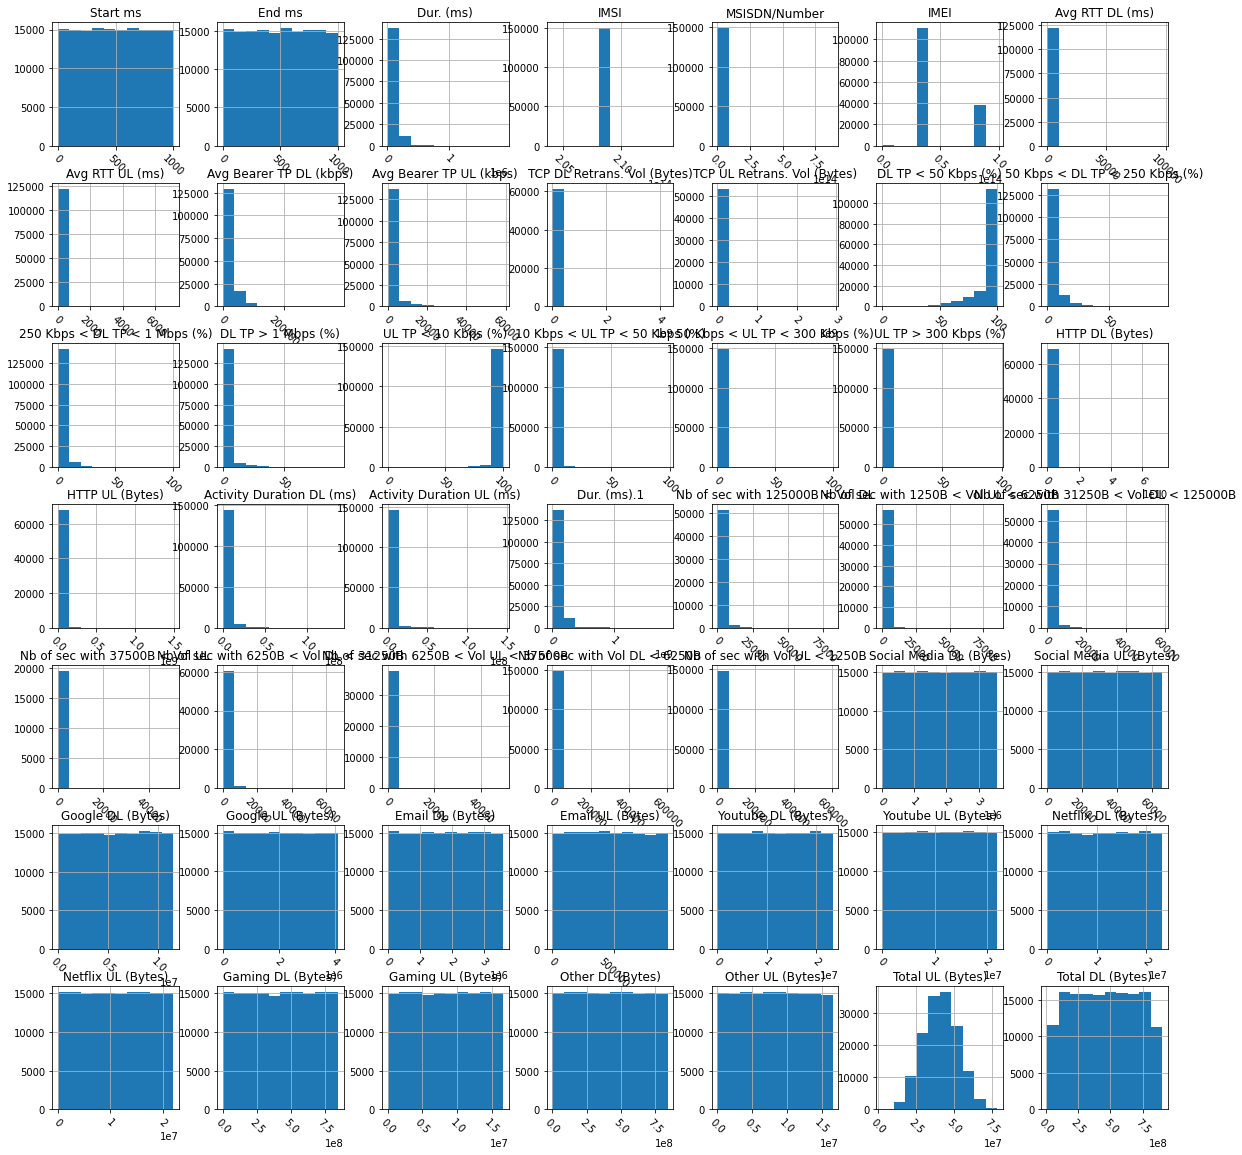

In [113]:
df.hist(figsize=(20,20), xrot=-45)

In [ ]:
report = ProfileReport(report_df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [179]:
df.head(4)

,PCA,Variable Names
34,0.423822,Social Media UL (Bytes)
33,0.271336,Social Media DL (Bytes)
35,0.238501,Google DL (Bytes)
45,0.203970,Other DL (Bytes)


In [ ]:
report.to_file("report.html")

In [8]:
## scaling and normalizing of the dataset

In [182]:
numerical_features = df.select_dtypes(include='number').columns.tolist()

In [183]:
categorical_features = df.select_dtypes(exclude='number').columns.to_list()

In [192]:
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [17]:
preprocessed_data = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, numerical_features),
    ('category', categorical_pipeline, categorical_features)
])

In [209]:
numerical_transforms = numeric_pipeline.fit_transform(df.select_dtypes(include='number'))

In [210]:
numerical_features

['Start ms',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Em

In [199]:
categorical_features

['Bearer Id',
 'Start',
 'End',
 'Last Location Name',
 'Handset Manufacturer',
 'Handset Type']

In [217]:
df.select_dtypes(include=['object']).astype(str)

,Bearer Id,Last Location Name,Handset Manufacturer,Handset Type
0,13114483460844900352,9164566995485190,Samsung,Samsung Galaxy A5 Sm-A520F
1,13114483482878900224,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530)
2,13114483484080500736,D42335A,Samsung,Samsung Galaxy A8 (2018)
3,13114483485442799616,T21824A,undefined,undefined
4,13114483499480700928,D88865A,Samsung,Samsung Sm-G390F
...,...,...,...,...
149996,7277825670196679680,D20434A,Apple,Apple iPhone 8 Plus (A1897)
149997,7349883264234609664,D10223C,Apple,Apple iPhone Se (A1723)
149998,13114483573367300096,T51102A,Apple,Apple iPhone Xs (A2097)
149999,13114483573367300096,L88342B,Huawei,Huawei Fig-Lx1


In [226]:
categorical_transforms = categorical_pipeline.fit_transform(df.select_dtypes(include=['object']).astype(str))

MemoryError: Unable to allocate 70.4 GiB for an array with shape (150001, 63007) and data type float64

In [20]:
numerical_transforms

array([[0.98850572, 0.77077077, 0.66266266, ..., 0.53230399, 0.44899105,
        0.33684625],
       [0.98850572, 0.23523524, 0.60660661, ..., 0.90919131, 0.67493396,
        0.72140079],
       [0.98850572, 0.001001  , 0.65265265, ..., 0.2545866 , 0.33150386,
        0.30439426],
       ...,
       [0.98850573, 0.28328328, 0.81081081, ..., 0.68330261, 0.4246416 ,
        0.65375757],
       [0.98850573, 0.6966967 , 0.32732733, ..., 0.08495744, 0.35459365,
        0.40718827],
       [0.51385153, 0.49968789, 0.49930018, ..., 0.4991133 , 0.50691856,
        0.49955529]])

In [ ]:
preped_data